# Text Vectorization techniques
This colab document demostrates following steps in text processing:
1. Text Processing
    * Reading text files with different formats
    * Normalize 
    * Tokenize
    * Stemming 
    * Lemmatization
    * Case folding / Lowercasing
    * POS Tagging
    * NER
2. Vectorization
    * Count Vectorizer
    * TFIDF Vectorizer
    * Effects of n-grams to the vectors
    * Effects of min_df and max_df
3. Visualization
    * Plot tokens with t-sne
    * Similar vectors
4. Distributed Representations
    * Word2Vec
    * Plot tokens with t-sne
    * Similar vectors




In [46]:
# Dataset representation
import pandas as pd

# String manipulations
import string
import re

# Text processing and NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Reading Data
- Read the dataset in an appropriate data structure

In [47]:
# Data: https://appen.com/datasets/combined-disaster-response-data/
df_csv = pd.read_csv("https://datasets.appen.com/appen_datasets/disaster_response_data/disaster_response_messages_training.csv", header = 0)
df_csv.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,split,message,original,genre,related,PII,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,train,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,train,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,12,train,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14,train,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15,train,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [48]:
## Reading "json" file using pandas
# df_json = pd.read_json("https://raw.githubusercontent.com/HSLCY/ABSA-BERT-pair/master/data/sentihood/sentihood-train.json")
# df_json.head()

In [49]:
d1 = list(df_csv.message)
dataset = d1 [:20]
dataset

['Weather update - a cold front from Cuba that could pass over Haiti',
 'Is the Hurricane over or is it not over',
 'says: west side of Haiti, rest of the country today and tonight',
 'Information about the National Palace-',
 'Storm at sacred heart of jesus',
 'Please, we need tents and water. We are in Silo, Thank you!',
 'I would like to receive the messages, thank you',
 "There's nothing to eat and water, we starving and thirsty.",
 'I am in Petionville. I need more information regarding 4636',
 'I am in Thomassin number 32, in the area named Pyron. I would like to have some water. Thank God we are fine, but we desperately need water. Thanks',
 "Let's do it together, need food in Delma 75, in didine area",
 'More information on the 4636 number in order for me to participate. ( To see if I can use it )',
 'A Comitee in Delmas 19, Rue ( street ) Janvier, Impasse Charite #2. We have about 500 people in a temporary shelter and we are in dire need of Water, Food, Medications, Tents and 

## Preprocessing
- To preprocess your text simply means to bring your text into a form that is predictable and analyzable for your task. This may include lowercasing, stemming, lemmatization, stop-words removal etc. Tokenize the documents carefully to extract individual terms.


### Removing HTML Tags
- Datasets often contain tags when downloaded and hence its removal is paramount.

In [50]:
def remTags(text):
    # Using regular expressions to match html tags and replace them with ''
    updated = re.sub('<[^<]+?>', '', text)
    return updated

In [51]:
d1_string = ''
for i in range(len(dataset)):
  s = df_csv['message'][i]
  d1_string += remTags(s)

d1_string

"Weather update - a cold front from Cuba that could pass over HaitiIs the Hurricane over or is it not oversays: west side of Haiti, rest of the country today and tonightInformation about the National Palace-Storm at sacred heart of jesusPlease, we need tents and water. We are in Silo, Thank you!I would like to receive the messages, thank youThere's nothing to eat and water, we starving and thirsty.I am in Petionville. I need more information regarding 4636I am in Thomassin number 32, in the area named Pyron. I would like to have some water. Thank God we are fine, but we desperately need water. ThanksLet's do it together, need food in Delma 75, in didine areaMore information on the 4636 number in order for me to participate. ( To see if I can use it )A Comitee in Delmas 19, Rue ( street ) Janvier, Impasse Charite #2. We have about 500 people in a temporary shelter and we are in dire need of Water, Food, Medications, Tents and Clothes. Please stop by and see us.We need food and water in 

### Removing Punctuations
- Remove punctuations (i.e. ",", ".", "!", "\") from the text

In [52]:
def remPunctuations(text):
    # table is a translation table for removing the punctuation marks from the words
    table = str.maketrans({key: None for key in string.punctuation})
    translated = text.translate(table)
    return translated

In [53]:
d1_string = remPunctuations(d1_string)
d1_string

'Weather update  a cold front from Cuba that could pass over HaitiIs the Hurricane over or is it not oversays west side of Haiti rest of the country today and tonightInformation about the National PalaceStorm at sacred heart of jesusPlease we need tents and water We are in Silo Thank youI would like to receive the messages thank youTheres nothing to eat and water we starving and thirstyI am in Petionville I need more information regarding 4636I am in Thomassin number 32 in the area named Pyron I would like to have some water Thank God we are fine but we desperately need water ThanksLets do it together need food in Delma 75 in didine areaMore information on the 4636 number in order for me to participate  To see if I can use it A Comitee in Delmas 19 Rue  street  Janvier Impasse Charite 2 We have about 500 people in a temporary shelter and we are in dire need of Water Food Medications Tents and Clothes Please stop by and see usWe need food and water in Klecin 12 We are dying of hunger Im

### Tokenization function
- This function takes string data type as input and outputs of series of tokens

In [54]:
# takes a string input and returns a list of tokens
def tokenize(text):
    return word_tokenize(text)

In [55]:
d1_tokens = tokenize(d1_string)
d1_tokens[:10] # returns a list

['Weather',
 'update',
 'a',
 'cold',
 'front',
 'from',
 'Cuba',
 'that',
 'could',
 'pass']

### Stop-words removal function 
- Removing the stop words using the english vocabulary

In [56]:
# takes in a list of tokens and returns a list of tokens with stopwords removed
def remStop(tokens):
    stop_words = set(stopwords.words('english'))
    filtered = [t for t in tokens if not t in stop_words]
    return filtered

In [57]:
d1_tokens = remStop(d1_tokens)
d1_tokens[:10] #still a list

['Weather',
 'update',
 'cold',
 'front',
 'Cuba',
 'could',
 'pass',
 'HaitiIs',
 'Hurricane',
 'oversays']

### Stemming, Lemmatization & Lowercasing
- Functions for finding the stemmed word, the root and then to convert all the documents to lower case

In [58]:
def stem(tokens):
    ps = PorterStemmer()
    stemmed = [ps.stem(t) for t in tokens]
    return list(set(stemmed))

In [59]:
d1_stems = stem(d1_tokens) #still a list of stemmed words which might not make sense
d1_stems[:10]

['usw',
 'weather',
 'moleya',
 'see',
 'I',
 'chretien',
 'noth',
 'medic',
 'shelter',
 'inform']

In [60]:
def lemmatize(tokens):
    lz = WordNetLemmatizer()
    lemmatized = [lz.lemmatize(t) for t in tokens]
    return list(set(lemmatized))

In [61]:
d1_lemmas = lemmatize(d1_tokens)
d1_lemmas[:10] #still a list which contains lemmas of the words in the dataset

['information',
 'Silo',
 'see',
 'I',
 'ThanksI',
 'meThose',
 'shelter',
 'front',
 'cold',
 'Tents']

In [62]:
def toLower(tokens):
    return [t.lower() for t in tokens]

In [63]:
d1_lower = toLower(d1_lemmas)
d1_lower[:10]

['information',
 'silo',
 'see',
 'i',
 'thanksi',
 'methose',
 'shelter',
 'front',
 'cold',
 'tents']

### POS Tagging


*   Function to Assign POS tags to each token
*   Pass tokens of a document as arguments to the given function,the returned value will have POS tags corresponding to each token in that document

In [64]:
nltk.download('averaged_perceptron_tagger')
def POStagging(tokens):
    return nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [65]:
d1_pos = POStagging(d1_tokens)
d1_pos[:10]

[('Weather', 'NNP'),
 ('update', 'JJ'),
 ('cold', 'NN'),
 ('front', 'NN'),
 ('Cuba', 'NNP'),
 ('could', 'MD'),
 ('pass', 'VB'),
 ('HaitiIs', 'NNP'),
 ('Hurricane', 'NNP'),
 ('oversays', 'VBZ')]

**Q: Can you think of a reason why POS tagger needs to be contextual?**

### Named Entity Recognition (NER) 
(also known as entity identification, entity chunking and entity extraction) 

**What is an entity?**

Named entity is any real-world object, such as persons, locations, organizations, products, etc., that can be denoted with a proper name. e.g., New York City is an instance of a Place.

**Use cases:**

*   Creating related tags or linking to relevant topics
*   Context understanding in search, recommendations




---



Using another useful NLP library called **[Spacy](https://spacy.io/usage)**.

In [66]:
# Install and import spacy
!pip install -U spacy
import spacy
print("\n\nSpacy with version=={} imported.".format(spacy.__version__))

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.3.2)


Spacy with version==2.3.2 imported.


**Language Model for Spacy:**
A language model is the context provider for a particular language. It contains informations such as how the words are related and which one's are tags, entity, etc.

In [67]:
# Download the language model for spacy
!python -m spacy download en
spacy_model = spacy.load('en')  ## spacy_model = spacy.load("en_core_web_sm")
print("\n\nSpacy model imported at: {}".format(spacy_model))

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


Spacy model imported at: <spacy.lang.en.English object at 0x7fbfcc141c50>


In [68]:
doc1 = spacy_model(u"Apple Inc is looking at buying U.K. startup for $1 billion.")
for ent in doc1.ents:
    print("Token [{}] -> Entity type [{}] indices [{}] - [{}].".format(ent.text, ent.label_, ent.start_char, ent.end_char))

Token [Apple Inc] -> Entity type [ORG] indices [0] - [9].
Token [U.K.] -> Entity type [GPE] indices [31] - [35].
Token [$1 billion] -> Entity type [MONEY] indices [48] - [58].


In [69]:
# Filtering sentences
doc2 = spacy_model(u"""In the expression named entity, the word named restricts
                   the task to those entities for which one or many strings,
                   such as words or phrases, stands (fairly) consistently for
                   some referent. This is closely related to rigid designators,
                   as defined by Kripke[3][4], although in practice NER deals
                   with many names and referents that are not philosophically
                   'rigid'. For instance, the automotive company created by
                   Henry Ford in 1903 can be referred to as Ford or Ford Motor
                   Company, although 'Ford' can refer to many other entities as
                   well (see Ford). Rigid designators include proper names as
                   well as terms for certain biological species and substances,
                   but exclude pronouns (such as 'it'; see coreference 
                   resolution), descriptions that pick out a referent by its 
                   properties (see also De dicto and de re), and names for kinds
                   of things as opposed to individuals (for example 'Bank').""")
sentences = list(doc2.sents)
print("This is the first sentence: [{}]".format(sentences [0]))
sentences

This is the first sentence: [In the expression named entity, the word named restricts
                   the task to those entities for which one or many strings,
                   such as words or phrases, stands (fairly) consistently for
                   some referent.]


[In the expression named entity, the word named restricts
                    the task to those entities for which one or many strings,
                    such as words or phrases, stands (fairly) consistently for
                    some referent.,
 This is closely related to rigid designators,
                    as defined by Kripke[3][4], although in practice NER deals
                    with many names and referents that are not philosophically
                    'rigid'.,
 For instance, the automotive company created by
                    Henry Ford in 1903 can be referred to as Ford or Ford Motor
                    Company, although 'Ford' can refer to many other entities as
                    well (see Ford).,
 Rigid designators include proper names as
                    ,
 well as terms for certain biological species and substances,
                    but exclude pronouns (such as 'it'; see coreference 
                    resolution), descriptions that pick out a refe

**Q: Write a function to process all the text data from any of the datasets using spacy.**

In [70]:
# your function here:
# def filtering_ner():

In [71]:
# call your function from here:
# tokens, ners, start_idx, end_idx = filtering_ner()

### TF-IDF Vector Representation of Documents

TF-IDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word or term has its respective TF and IDF score. The product of the TF and IDF scores of a term is called the TF*IDF weight of that term.
Put simply, the higher the TF*IDF score (weight), the rarer the term and vice versa.

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
stop_words = set(stopwords.words('english'))
c_vectorizer = CountVectorizer(stop_words=stop_words,lowercase = True)
Count_Vectors = c_vectorizer.fit_transform(dataset)
Count_Vectors.shape

(20, 102)

In [74]:
first_freq_vector = Count_Vectors[0]
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_freq_vector.T.todense(), index=c_vectorizer.get_feature_names(), columns=["count"])
df.sort_values(by=["count"],ascending=False)

,count
cuba,1
update,1
haiti,1
could,1
cold,1
...,...
hurricane,0
hungry,0
hunger,0
heart,0


In [75]:
stop_words = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=stop_words,lowercase = True)
Doc_TFIDF_Vector = vectorizer.fit_transform(dataset)

In [76]:
#Shape of the Document Vector
print("Shape of the TF-IDF Vector is:",Doc_TFIDF_Vector[0].shape)

Shape of the TF-IDF Vector is: (1, 102)


#### Visualizing TF-IDF Vector of the first document

In [77]:
# import pandas as pd 
first_doc_vector = Doc_TFIDF_Vector[0]
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_doc_vector.T.todense(), index=vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
cuba,0.358686
update,0.358686
could,0.358686
cold,0.358686
pass,0.358686
...,...
hurricane,0.000000
hungry,0.000000
hunger,0.000000
heart,0.000000


**Q: Count the non-zero entries in the first vector**

In [78]:
## Code here:


#### Visualizing TF-IDF Vector representation of tokens

In [79]:
# To know which words the indices are referring to
features  = vectorizer.get_feature_names()
features[:20]

['12',
 '19',
 '32',
 '4636',
 '500',
 '75',
 'area',
 'charite',
 'chretien',
 'clothes',
 'cold',
 'comitee',
 'could',
 'country',
 'cuba',
 'delma',
 'delmas',
 'desperately',
 'didine',
 'died']

## Find similar documents
Given a list of documents, find k most similar documents to it using TFIDF vectors

In [80]:
query_doc = pd.read_csv("https://datasets.appen.com/appen_datasets/disaster_response_data/disaster_response_messages_test.csv")
# query_doc.head()
queries = query_doc.message[:10].to_list()
queries

['UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.',
 'We are at Gressier we needs assistance right away. ASAP, Come help us.',
 'Delmas 33 in Silo, need water.',
 'SOS SOS, please provide police officers on the streets as they are very insecure',
 'I am a driver, a mechanic ,. I want to help',
 'We are at Fort Mercredi ( wednesday ) where can we find tents and treated water.',
 'Our imcomprehensibley of 9 member was repatriated incomprehensible - (Location) Duvivier, Fond Grango',
 'A cold front is on Cuba this morning. It could cross Haiti tomorrow. Isolated rain showers are expected for our region.',
 'Please Bo Gravel Vob Ta A 41 we are hungry. Need food.',
 'We are not located in one place, and i want you to know there is a lot of available spaces to put up tent for shelters  is the reason why we station in front of our house for more safety against thief, as you see.']

In [81]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

**Q: Write function to find most similar vectors for Count and TFIDF vectors.**

In [82]:
# Code here: Use cosine_similarity or cosine_distances to calculate vector similarity

## Visualization
Use t-sne to project vectors into 2 dimensions and plot

In [83]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [84]:
def plot_features_tsne(X, tokens: list = None, limit_view: int = -11):
    """ Plots TSNE representations of tokens and their embeddings.

    :param X: N x D
    :param tokens: N
    :param limit_view:
    """
    tsne = TSNE(n_components=2, random_state=0)

    # if limit_view > X.shape[0]:
    #     limit_view = X.shape[0]

    # if limit_view > 0:
    #     X = X[:limit_view, ]
    #     tokens = tokens[:limit_view]
    # elif limit_view < 0:
    #     X = X[limit_view:, ]
    #     tokens = tokens[limit_view:]
    # else:
    #     pass

    X_2d = tsne.fit_transform(X)
    print(X_2d.shape, len(tokens))
    colors = range(X_2d.shape[0])

    plt.figure(figsize=(6, 5))
    if tokens is not None:
        for i, token in enumerate(tokens):
            plt.annotate(token, xy=(X_2d[i, 0], X_2d[i, 1]), zorder=1)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colors, s=60, alpha=.5)
    plt.title('TSNE visualization of input vectors in 2D')
    # plt.xlabel('x-axis')
    # plt.ylabel('y-axis')
    plt.show()

(20, 2) 20


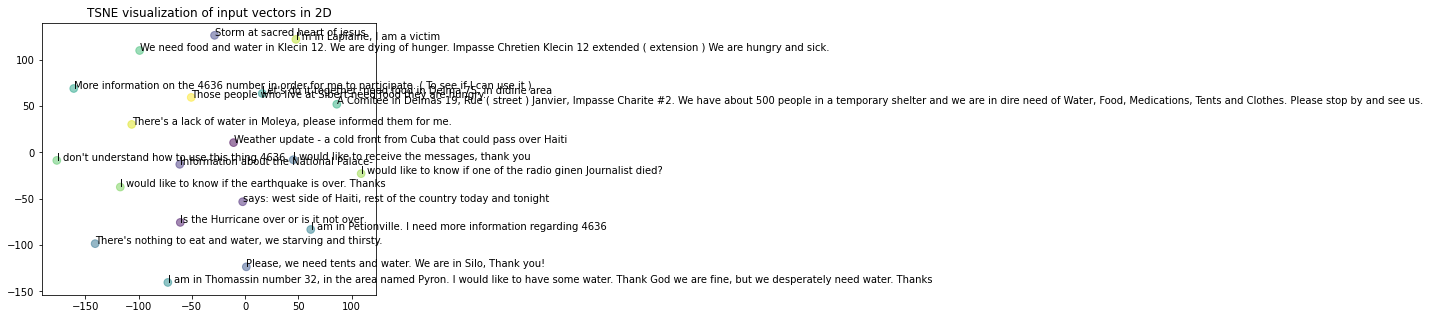

In [85]:
# print(Count_Vectors.shape, len(c_vectorizer.get_feature_names()))
plot_features_tsne(Count_Vectors, tokens = dataset)

(20, 2) 20


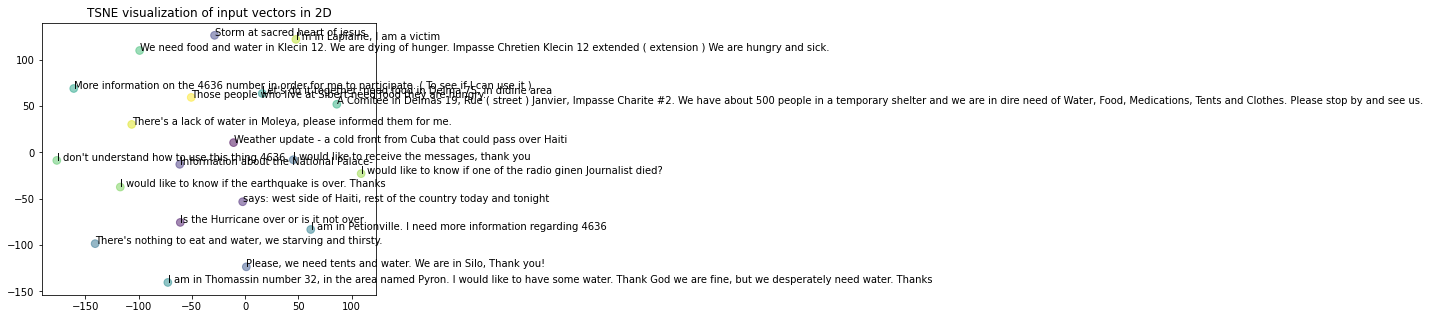

In [86]:
plot_features_tsne(Doc_TFIDF_Vector, tokens = dataset)

In [87]:
Count_Vectors.todense()

matrix([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [88]:
Doc_TFIDF_Vector.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.35868643, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.35868643,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

**Q: Investigate the difference bwteen count vector and tfidf vector of the token "au"**

# Natural Language Processing using Word2Vec

The idea behind Word2Vec is pretty simple. We’re making an assumption that the **meaning of a word can be inferred by the company it keeps**. This is analogous to the saying, “*show me your friends, and I’ll tell who you are*”. For example, the words shocked, appalled and astonished are usually used in a similar context.

In this hands-on session, you will learn how to use the [**Gensim**](https://radimrehurek.com/gensim/) implementation of Word2Vec (in python) and actually get it to work.

## Training the Word2Vec model

To train a Word2Vec model you need to pass all the documents. So, we are essentially passing a list of strings where each string within the main list contains the document. Gensim implementation needs vocabulary. And by vocabulary, I mean a set of unique words.

After building the vocabulary, we just need to call `train(...)`

*Behind the scenes*, we are actually training a **neural network with a single hidden layer**. But, we are actually not going to use the neural network after training. Instead, the goal is to learn the weights of the hidden layer. These weights are essentially the word vectors that we’re trying to learn.

In [ ]:
# First define the model
w2v_model = gensim.models.Word2Vec(vocab, size=300, window=10, min_count=1,
                                   workers=10)

# Now train the model
w2v_model.train(documents, total_examples=len(documents), epochs=10)
print("Training complete...")

## Understanding the parameters

> **size**: The size of the dense vector to represent each token (here word). If you have very limited data, then size should be a much smaller value. If you have lots of data, its good to experiment with various sizes. The standard size is usually `300`.

> **window**: The maximum distance between the target word and its neighboring words when considering context. If your neighbor's position is greater than the maximum window width to the left and the right, then, some neighbors are not considered as being related to the target word. In theory, a smaller window should give you terms that are more related. If you have lots of data, then the window size should not matter much, as long as its a decent sized window.

> **min_count**: Minimium frequency count of words. The model would ignore words that do not statisfy the min_count. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model.

> **workers**: How many threads to use behind the scenes?

**Note:** You can experiment with these parameter values. Specially experiment with `size` parameter.

### Now, let's look at some outputs of our trained model

1.   This first example shows a simple case of generating a vector for a token which is present in the vocabulary.
2.   Secondly we will look up words similar to a word in the corpus. All we need to do here is to call the `most_similar()` function and provide the word as the positive example. This returns the top 10 similar words.

In [ ]:
w1 = "backprop"
w2v_model.wv.most_similar (positive=w1)

In [ ]:
pos_words = ["improve",'increasing']
neg_words = ['calculate']
w2v_model.wv.most_similar (positive=pos_words, negative=neg_words, topn=10)

### Similarity between two words in the vocabulary
Use the Word2Vec model to return the similarity between two words that are present in the vocabulary. There are many similarity measurement metric, one of them is `cosine_similarity` which is used by Gensim internally.

Contextually related words should have higher similarity score and vice versa.

**Exercise:** Check what happens if two words should be close according to you.

In [ ]:
w2v_model.wv.similarity(w1="learning", w2="improving")

### Exercise: 
Try changing the size parameter and analyze it's effects in similarity score and other functions.

In [ ]:
# Hint: redefine the model with appropriate parameters and train:
word_vector_size = ???
w2v_model_new = gensim.models.Word2Vec(vocab, size=word_vector_size, window=10,
                                   min_count=1, workers=10)
w2v_model_new.train(documents, total_examples=len(documents), epochs=10)
print("Redefined training complete with [word_vector_size] = {}."
      .format(word_vector_size))

In [ ]:
**Compare the similarity values of two models**
## Your code here to compare 2 models based on word similarity and other attributes:

## Add any number of code blocks you deem necessary.


### Importing a pre-trained models
"Glove" or "GoogleNews"


In [ ]:
## Don't run, file not present.
from gensim.models.keyedvectors import KeyedVectors

pretrained_w2v_model = KeyedVectors.load_word2vec_format(
    join(model_dir,model_file_name + '.bin'),binary=True)

## Similar Documents (Word2Vec)

In [ ]:
for word in word_doc.iloc[:, 0]:
    print("=====================================")
    print("Query word :", str(word))
    print("=====================================")
    print("Similarity score and Words")
    print(w2v_model.wv.most_similar(positive=str(word)))

###Extras:
Task 5: Representing a document as the average of the vectors for the words that it contains.

In [ ]:
word_doc = pd.read_csv("w_d.csv", index_col='id')
print(word_doc)

In [ ]:
#pass the word2vec model trained above along with the document. Remember to pass the document after pre-processing
def get_mean_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    words = [word for word in doc if word in word2vec_model.wv.vocab]
    if len(words) >= 1:
        return np.mean(word2vec_model[words], axis=0)
    else:
        return []

- The following function call returns the average word vector for a single document. You've to repeat the same for all the documents in the corpus and find all similar docments as done in previous task.

In [ ]:
vec = get_mean_vector(w2v_model, queryDoc)
print(vec)

Task 6: Similarly for task 6, you've to find the weighted average of vectors of word. Think of a metric you could use for the same. Hint: tf-idf